In [4]:
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [5]:
df = pd.read_pickle('all_trips.pkl')
df.shape

(9134, 16)

### Trip duration

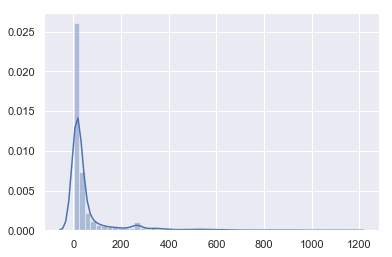

In [134]:
sns.set()
x = df['trip_duration']
ax = sns.distplot(x.to_list())

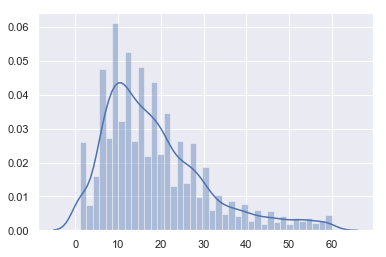

In [135]:
sns.set()
x_detail = df['trip_duration'][df['trip_duration'].between(1, 60, inclusive=True)]
ax = sns.distplot(x_detail.to_list())

### trips per day & hour 

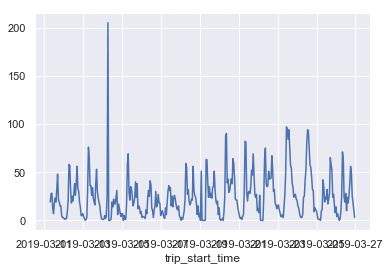

In [136]:
timeseries = df.set_index('trip_start_time')
x = timeseries.resample('H').size()

sns.lineplot(x=x.index , y= x.values)
sns.set_style("darkgrid")

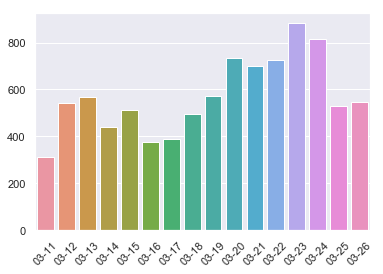

In [137]:
timeseries = df.set_index('trip_start_time')
x = timeseries.resample('d').size()

ax = sns.barplot(x=x.index.strftime('%m-%d'), y= x.values)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
sns.set_style("darkgrid")

### Weather

#### hourly

In [6]:
temp_per_hour = pd.read_pickle('weather_hourly.pkl')
temp_per_hour[['datetime','temp']].head(2)

,datetime,temp
0,2019-03-11 00:00:00,3.0
1,2019-03-11 01:00:00,2.0


In [7]:
trips_per_hour = df.groupby([pd.Grouper(key='trip_start_time',freq='H')]).size().reset_index(name='trips')
trips_per_hour.head(2)

,trip_start_time,trips
0,2019-03-11 08:00:00,19
1,2019-03-11 09:00:00,28


In [8]:
trips_per_hour = trips_per_hour.join(temp_per_hour.set_index('datetime'), on='trip_start_time')
trips_per_hour.head(2)

,trip_start_time,trips,temp,precip,rh,wind_spd
0,2019-03-11 08:00:00,19,3.5,0.0,76.0,7.95
1,2019-03-11 09:00:00,28,4.0,0.0,68.5,6.95


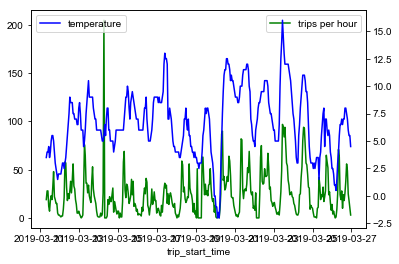

In [9]:
timeseries = trips_per_hour.set_index('trip_start_time')
x1 = timeseries['trips']
x2 = timeseries['temp']
sns.lineplot(x=x1.index , y= x1.values, color="g" , label = 'trips per hour')
ax2 = plt.twinx()
sns.lineplot(x=x1.index , y= x2.values, color="b", ax=ax2 , label = 'temp')
ax2.legend
plt.legend( loc='upper left', labels=['temperature'])
sns.set_style("darkgrid")

In [11]:
timeseries['temp'].corr(timeseries['trips'])

0.43667751407348215

#### daily

In [13]:
temp_per_day = pd.read_pickle('weather_daily.pkl')
trips_per_day = df.groupby([pd.Grouper(key='trip_start_time',freq='d')]).size().reset_index(name='trips')
trips_per_day = trips_per_day.join(temp_per_hour.set_index('datetime'), on='trip_start_time')
#trips_per_day

In [14]:
trips_per_day = trips_per_day.set_index('trip_start_time')
d1 = trips_per_day['trips']
d2 = trips_per_day['temp']

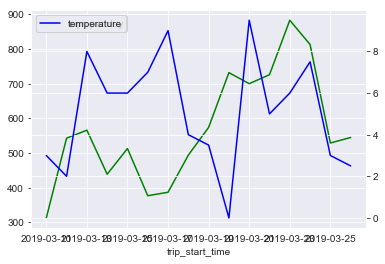

In [15]:
sns.lineplot(x=d1.index , y= d1.values, color="g" , label = 'trips per day')
ax2 = plt.twinx()
sns.lineplot(x=d1.index , y= d2.values, color="b", ax=ax2 , label = 'temp')
ax2.legend
plt.legend( loc='upper left', labels=['temperature'])
sns.set_style("darkgrid")

In [16]:
trips_per_day['temp'].corr(trips_per_day['trips'])

0.028296395345504207

### most frequent trips

In [151]:
grouped = df.groupby(['from_station','from_lat','from_long','from_station_mode',
                      'to_station','to_lat','to_long','to_station_mode']).size()
grouped.shape

(8458,)

In [152]:
grouped = pd.DataFrame(grouped).reset_index()
grouped.columns = ['from_station','from_lat','from_long','from_station_mode',
                   'to_station','to_lat','to_long','to_station_mode','cnt']
grouped = grouped.sort_values(by='cnt', ascending=False)
grouped.to_pickle('station_combis.pkl')
grouped.head()

,from_station,from_lat,from_long,from_station_mode,to_station,to_lat,to_long,to_station_mode,cnt
5823,S Sonnenallee,52.474241,13.455552,station,Sonnenallee/Treptower Straße,52.477550,13.448826,station,9
4229,Katzbachstraße,52.487904,13.376718,station,Marheinekeplatz,52.488976,13.394571,station,8
3784,Große Hamburger Str.,52.527123,13.398052,station,Schleidenplatz,52.515727,13.472426,station,8
6225,S+U Jannowitzbrücke,52.515326,13.417563,station,Rudi-Dutschke-Straße,52.507236,13.398167,station,8
3520,Fraenkelufer,52.496227,13.419697,station,Warschauer Str.,52.503377,13.444991,station,7


### top 10 pick up & return stations

In [146]:
df.groupby(['from_station']).size().sort_values(ascending=False).head(10)

from_station
Fraenkelufer                           90
Marheinekeplatz                        90
S+U Brandenburger Tor                  87
Hauptbahnhof/Europaplatz               82
Wrangelstraße                          67
U Frankfurter Tor                      66
S+U Alexanderplatz (Dircksenstraße)    65
Mehringdamm                            63
Herrfurthplatz                         61
Helsingforser Platz                    59
dtype: int64

In [147]:
df.groupby(['to_station']).size().sort_values(ascending=False).head(10)

to_station
Fraenkelufer                           92
Marheinekeplatz                        75
Hauptbahnhof/Europaplatz               75
Wrangelstraße                          73
S+U Brandenburger Tor                  71
U Frankfurter Tor                      62
S+U Alexanderplatz (Dircksenstraße)    61
Oranienplatz                           58
Mehringdamm                            55
U Südstern                             55
dtype: int64

In [ ]:
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")